In [7]:
# from asyncio.windows_events import INFINITE
from cmath import nan
from math import inf
from cv2 import kmeans
import numpy as np
import random as rnd
import pandas as pd
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import laplacian as lap
from sklearn.metrics import adjusted_rand_score as ari
from sklearn.metrics import pairwise_distances as outer
from sklearn.metrics import normalized_mutual_info_score as nmi

In [8]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import numpy as np
import seaborn as sns
import pandas as pd  

In [18]:
train=pd.read_csv(open('Train.csv'))
test=pd.read_csv(open('Census.csv'))
train.shape,test.shape

((64, 43), (1059, 39))

In [10]:
train

,Trail,Soil,Left,Distinct,log(AB),log(OA),log(OB),log(AC),log(CD),log(OD),...,log(maj_o * min_o),log(maj_a / min_a),log(maj_b / min_b),log(maj_c / min_c),log(maj_d / min_d),log(maj_o / min_o),bounding area,bounding ratio,Long,Lat
0,Bagmara,1,0,1,1.024,1.486,1.605,1.780,1.214,1.708,...,2.212,0.503,0.400,0.508,0.355,0.252,4.566,0.199,88.971,21.688
1,Bagmara,1,0,1,1.126,1.386,1.618,1.723,1.068,1.661,...,2.106,0.318,0.346,0.303,0.411,0.309,4.487,0.047,88.982,21.686
2,Gona,1,0,1,1.177,1.665,1.809,1.849,1.219,1.800,...,2.120,0.391,0.627,0.722,0.562,0.277,4.697,0.033,88.983,21.696
3,Bagmara,1,1,1,1.035,1.533,1.624,1.801,1.166,1.717,...,2.222,0.207,0.430,0.251,0.293,0.307,4.608,0.081,88.977,21.689
4,Gona,1,1,1,1.049,1.652,1.752,1.715,1.102,1.627,...,2.097,0.451,0.497,0.465,0.522,0.383,4.530,0.076,88.975,21.697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Gazikhali-3,2,1,0,1.185,1.777,1.803,1.875,1.315,1.852,...,2.398,0.328,0.351,0.327,0.306,0.280,4.824,-0.019,88.785,21.968
60,Gazikhali-3,2,1,0,1.051,1.753,1.835,1.828,1.422,1.899,...,2.401,0.294,0.385,0.294,0.228,0.244,4.802,-0.037,88.785,21.963
61,Mechua-2,3,0,0,1.201,1.772,1.932,1.851,1.231,1.941,...,2.583,0.303,0.319,0.281,0.210,0.179,4.912,0.056,88.996,21.610
62,Mechua-1,3,0,0,1.141,1.755,1.848,1.817,1.258,1.745,...,2.478,0.300,0.436,0.411,0.350,0.178,4.839,0.049,89.001,21.608


In [19]:
x_test=np.array(test)
print(f'X-Shape:{x_test.shape}')

X-Shape:(1059, 39)


In [20]:
x_train=np.array(train.iloc[:,4:])
print(f'X-Shape:{x_train.shape}')
y=np.array(train.iloc[:,3])
y.sum()

X-Shape:(64, 39)


25

In [13]:
P=SpectralClustering(n_clusters=1000).fit_predict(x_test)
len(set(P))

KeyboardInterrupt: 

In [ ]:
x=np.array([1]*39)
x=np.array([x,x])
x

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
df.plot(x="longitude", y="latitude", kind="scatter", c="brightness",
        colormap="YlOrRd")

In [21]:
k=39
pca = PCA(n_components=39)
# pca.fit(x_train)
z=pca.fit_transform(x_train)
# pca.inverse_transform(
t=pd.DataFrame()
t['w']=abs(pca.transform(x))[0]
t['var']=train.columns[4:]
P=SpectralClustering(n_clusters=25).fit_predict(z)
len(set(P[:25]))

NameError: name 'x' is not defined

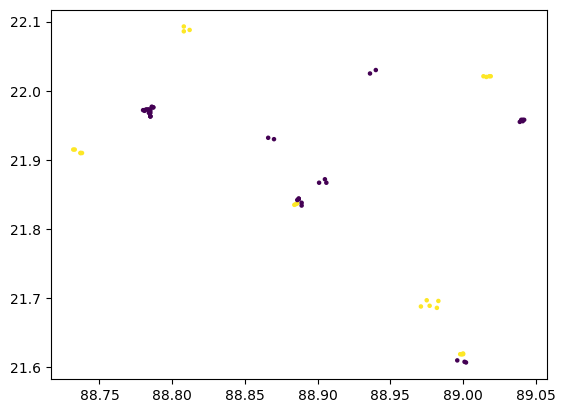

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=train['Long'],y=train['Lat'],c=train['Distinct'],s=5)

In [ ]:
w=np.array(1/t['w'])
def dist(x,y):
    return (w*(x-y)**2).sum()
    

In [15]:
m={}
for j in range(25,64):
    s=x_train[j]
    r=np.array([dist(s,i) for i in x_train[:25]])
    # len(r[r<5])
    m[j]=r.argsort()[0]
p=set(m.values())
print(f'{len(p)}:{p}')

NameError: name 'dist' is not defined

C:\Users\rinmo\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


20

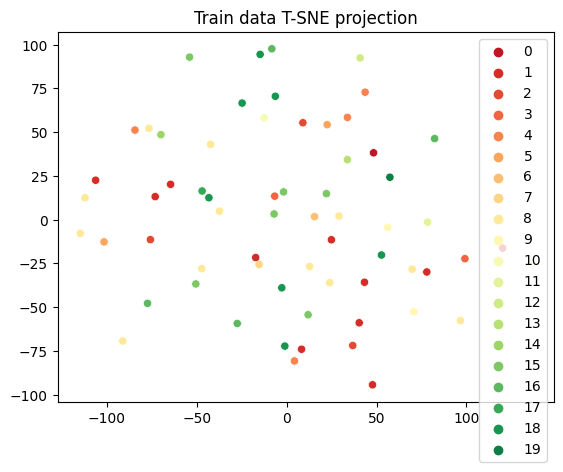

In [34]:
tsne = TSNE(n_components=3,random_state=123,perplexity=14)
z=tsne.fit_transform(x_train) 
# sns.scatterplot(x= z[:,0], y=z[:,1],palette=sns.color_palette("hls",3)).set(title="Train data T-SNE projection") 
k=20
# P=KMeans(n_clusters=k).fit_predict(z)
P=SpectralClustering(n_clusters=k).fit_predict(z)
sns.scatterplot(x= z[:,0], y=z[:,1],hue=P,palette=sns.color_palette('RdYlGn',k)).set(title="Train data T-SNE projection") 
len(set(P))
# dict[i]=len(set(P[:25]))

In [ ]:
perp=[*range(4,50)]
dict={}
for i in perp:
    tsne = TSNE(n_components=3,random_state=123,perplexity=5)
    z = tsne.fit_transform(x_train)
    # sns.scatterplot(x= z[:,0], y=z[:,1],palette=sns.color_palette("hls",3)).set(title="Train data T-SNE projection") 
    k=25
    # P=KMeans(n_clusters=k).fit_predict(z)
    P=SpectralClustering(n_clusters=k).fit_predict(z)
    dict[i]=len(set(P[:25]))

In [ ]:
dict

{4: 15,
 5: 11,
 6: 11,
 7: 14,
 8: 15,
 9: 14,
 10: 15,
 11: 12,
 12: 13,
 13: 18,
 14: 25,
 15: 8,
 16: 13,
 17: 16,
 18: 13,
 19: 15,
 20: 11,
 21: 14,
 22: 14,
 23: 12,
 24: 16,
 25: 13,
 26: 15,
 27: 14,
 28: 12,
 29: 13,
 30: 12,
 31: 14,
 32: 14,
 33: 14,
 34: 12,
 35: 12,
 36: 13,
 37: 16,
 38: 15,
 39: 12,
 40: 13,
 41: 10,
 42: 11,
 43: 15,
 44: 15,
 45: 16,
 46: 10,
 47: 17,
 48: 14,
 49: 14}

In [ ]:
comp=[*range(5,40)]
dict={}
for i in comp:
    pca = PCA(n_components=i)
    z =pca.fit_transform(x_train)
    # sns.scatterplot(x= z[:,0], y=z[:,1],palette=sns.color_palette("hls",3)).set(title="Train data T-SNE projection") 
    k=25
    # P=KMeans(n_clusters=k).fit_predict(z)
    P=SpectralClustering(n_clusters=k).fit_predict(z)
    dict[i]=len(set(P[:25]))
    dict

In [ ]:
dict

{5: 14,
 6: 13,
 7: 13,
 8: 14,
 9: 13,
 10: 13,
 11: 14,
 12: 14,
 13: 13,
 14: 14,
 15: 14,
 16: 13,
 17: 14,
 18: 14,
 19: 15,
 20: 14,
 21: 13,
 22: 15,
 23: 14,
 24: 13,
 25: 13,
 26: 13,
 27: 14,
 28: 13,
 29: 13,
 30: 14,
 31: 13,
 32: 13,
 33: 13,
 34: 15,
 35: 14,
 36: 14,
 37: 13,
 38: 14,
 39: 13}

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = '5'
tsne = TSNE(n_components=3,random_state=4,perplexity=10)
z = tsne.fit_transform(x_test[:700])
# sns.scatterplot(x= z[:,0], y=z[:,1],palette=sns.color_palette("hls",3)).set(title="Train data T-SNE projection") 
k=600
# P=KMeans(n_clusters=k).fit_predict(z)
P=SpectralClustering(n_clusters=k).fit_predict(z)
len(set(P[:25]))
# sns.scatterplot(x= z[:,0], y=z[:,1],hue=P,palette=sns.color_palette('RdYlGn',k)).set(title="Train data T-SNE projection") 

c:\Users\rinmo\.conda\envs\tf2.10\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\rinmo\.conda\envs\tf2.10\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\rinmo\.conda\envs\tf2.10\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\rinmo\.conda\envs\tf2.10\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\rinmo\.conda\envs\tf2.10\lib\site-packages\sklearn\cluster\_kmeans.py:379: ConvergenceWarning: Number of di

1

In [ ]:
bins=[]
for i in range(1,k+1):
    bins.append(len(np.where(P==i)[0]))
    # print(f"{i}'s:{np.where(P==i)}")

<AxesSubplot: >

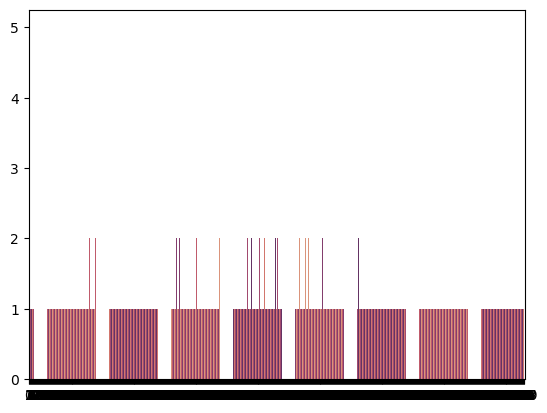

In [ ]:
pal=sns.color_palette('flare')
sns.barplot(x=[*range(k)],y=bins,orient='v',palette=pal)

In [ ]:
bins=np.array(bins)
np.where(bins==0)

(array([999], dtype=int64),)

In [ ]:
bins

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,

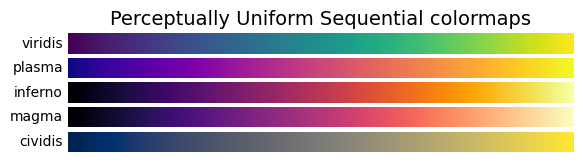

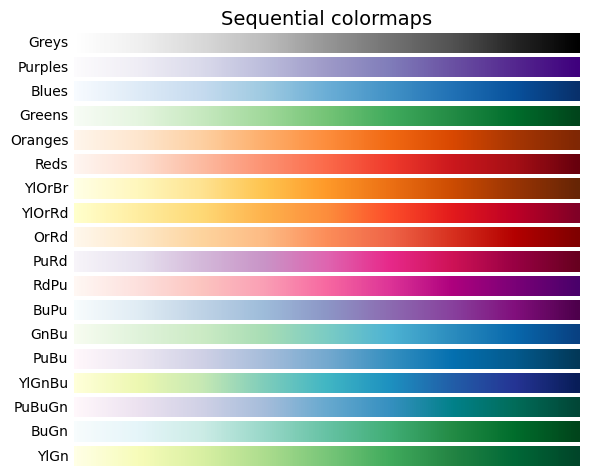

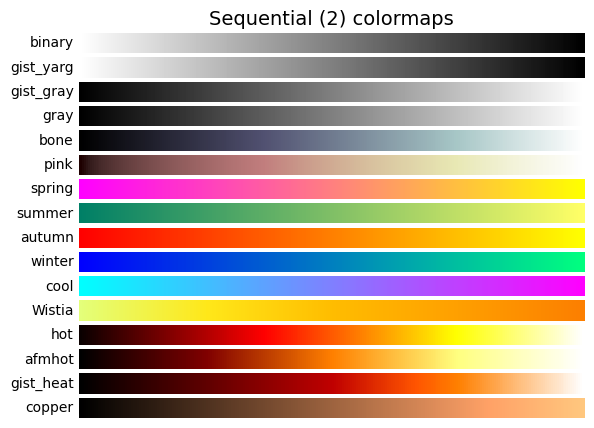

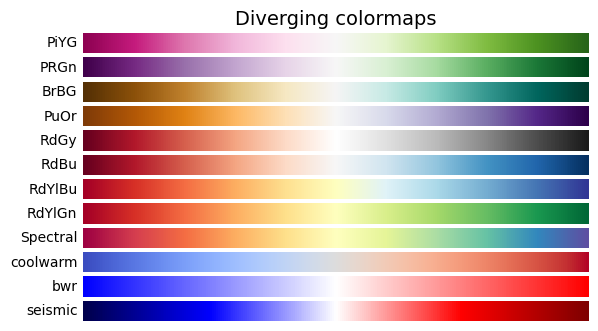

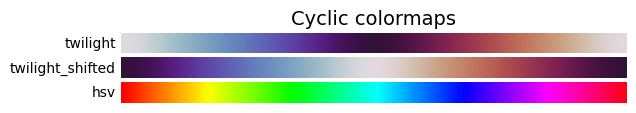

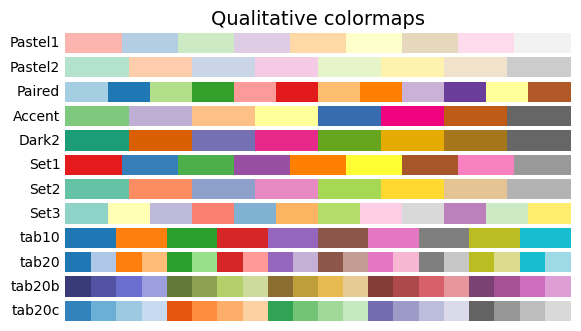

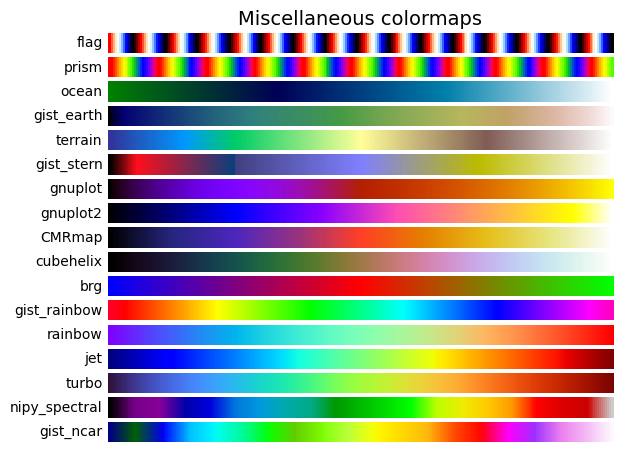

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axs[0].set_title(f"{cmap_category} colormaps", fontsize=14)

    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap_name)
        ax.text(-.01, .5, cmap_name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

In [ ]:
pca = PCA(n_components=15)
pca.fit(x_train)

PCA(n_components=15)

In [ ]:
t=pca.fit_transform(x_train)
P=KMeans(n_clusters=25).fit_predict(t)
# sns.scatterplot(x=t[:,0], y=z[:,1],hue=P,palette=sns.color_palette('RdYlGn',k)).set(title="Train data T-SNE projection") 
P[:25]

c:\Users\rinmo\.conda\envs\tf2.10\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([ 5, 18, 16,  5, 23,  3, 10,  1,  9,  3,  3, 11,  6,  6,  6, 21, 21,
        8, 20, 17,  6, 12, 12, 24, 24])

In [ ]:
x_new = pca.inverse_transform(pca.fit_transform(x_train))
x_new

array([[1.03517586e+00, 1.47825108e+00, 1.61755525e+00, ...,
        2.00319651e-01, 8.90050673e+01, 2.17128700e+01],
       [1.11865216e+00, 1.40039590e+00, 1.60918816e+00, ...,
        6.36453869e-02, 8.90161893e+01, 2.17157107e+01],
       [1.18280451e+00, 1.68690676e+00, 1.81093303e+00, ...,
        8.65421620e-02, 8.91047406e+01, 2.17825048e+01],
       ...,
       [1.19319960e+00, 1.78360225e+00, 1.92976584e+00, ...,
        6.85691483e-02, 8.90227695e+01, 2.16218099e+01],
       [1.14336064e+00, 1.74975791e+00, 1.85109239e+00, ...,
        2.92853562e-02, 8.90049345e+01, 2.16127265e+01],
       [1.17573624e+00, 1.75921948e+00, 1.88289471e+00, ...,
        8.91651515e-02, 8.90107198e+01, 2.16169181e+01]])

In [ ]:
var=pca.explained_variance_ratio_
np.cumsum(var)

array([0.49327522, 0.74623207, 0.84062975, 0.87773748, 0.90617659,
       0.92642742, 0.94049196, 0.95231315, 0.963599  , 0.97275263,
       0.9798452 , 0.98375469, 0.98705396, 0.9897344 , 0.99212107])

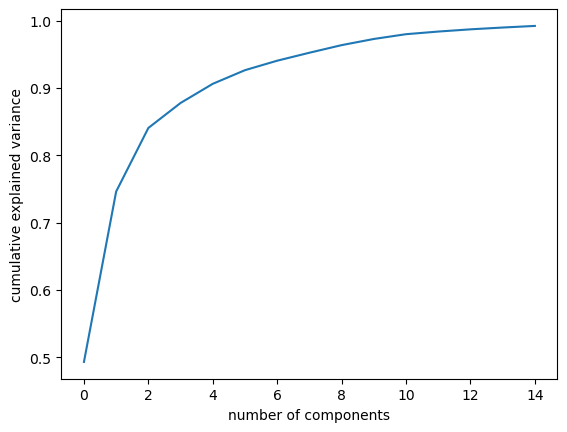

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

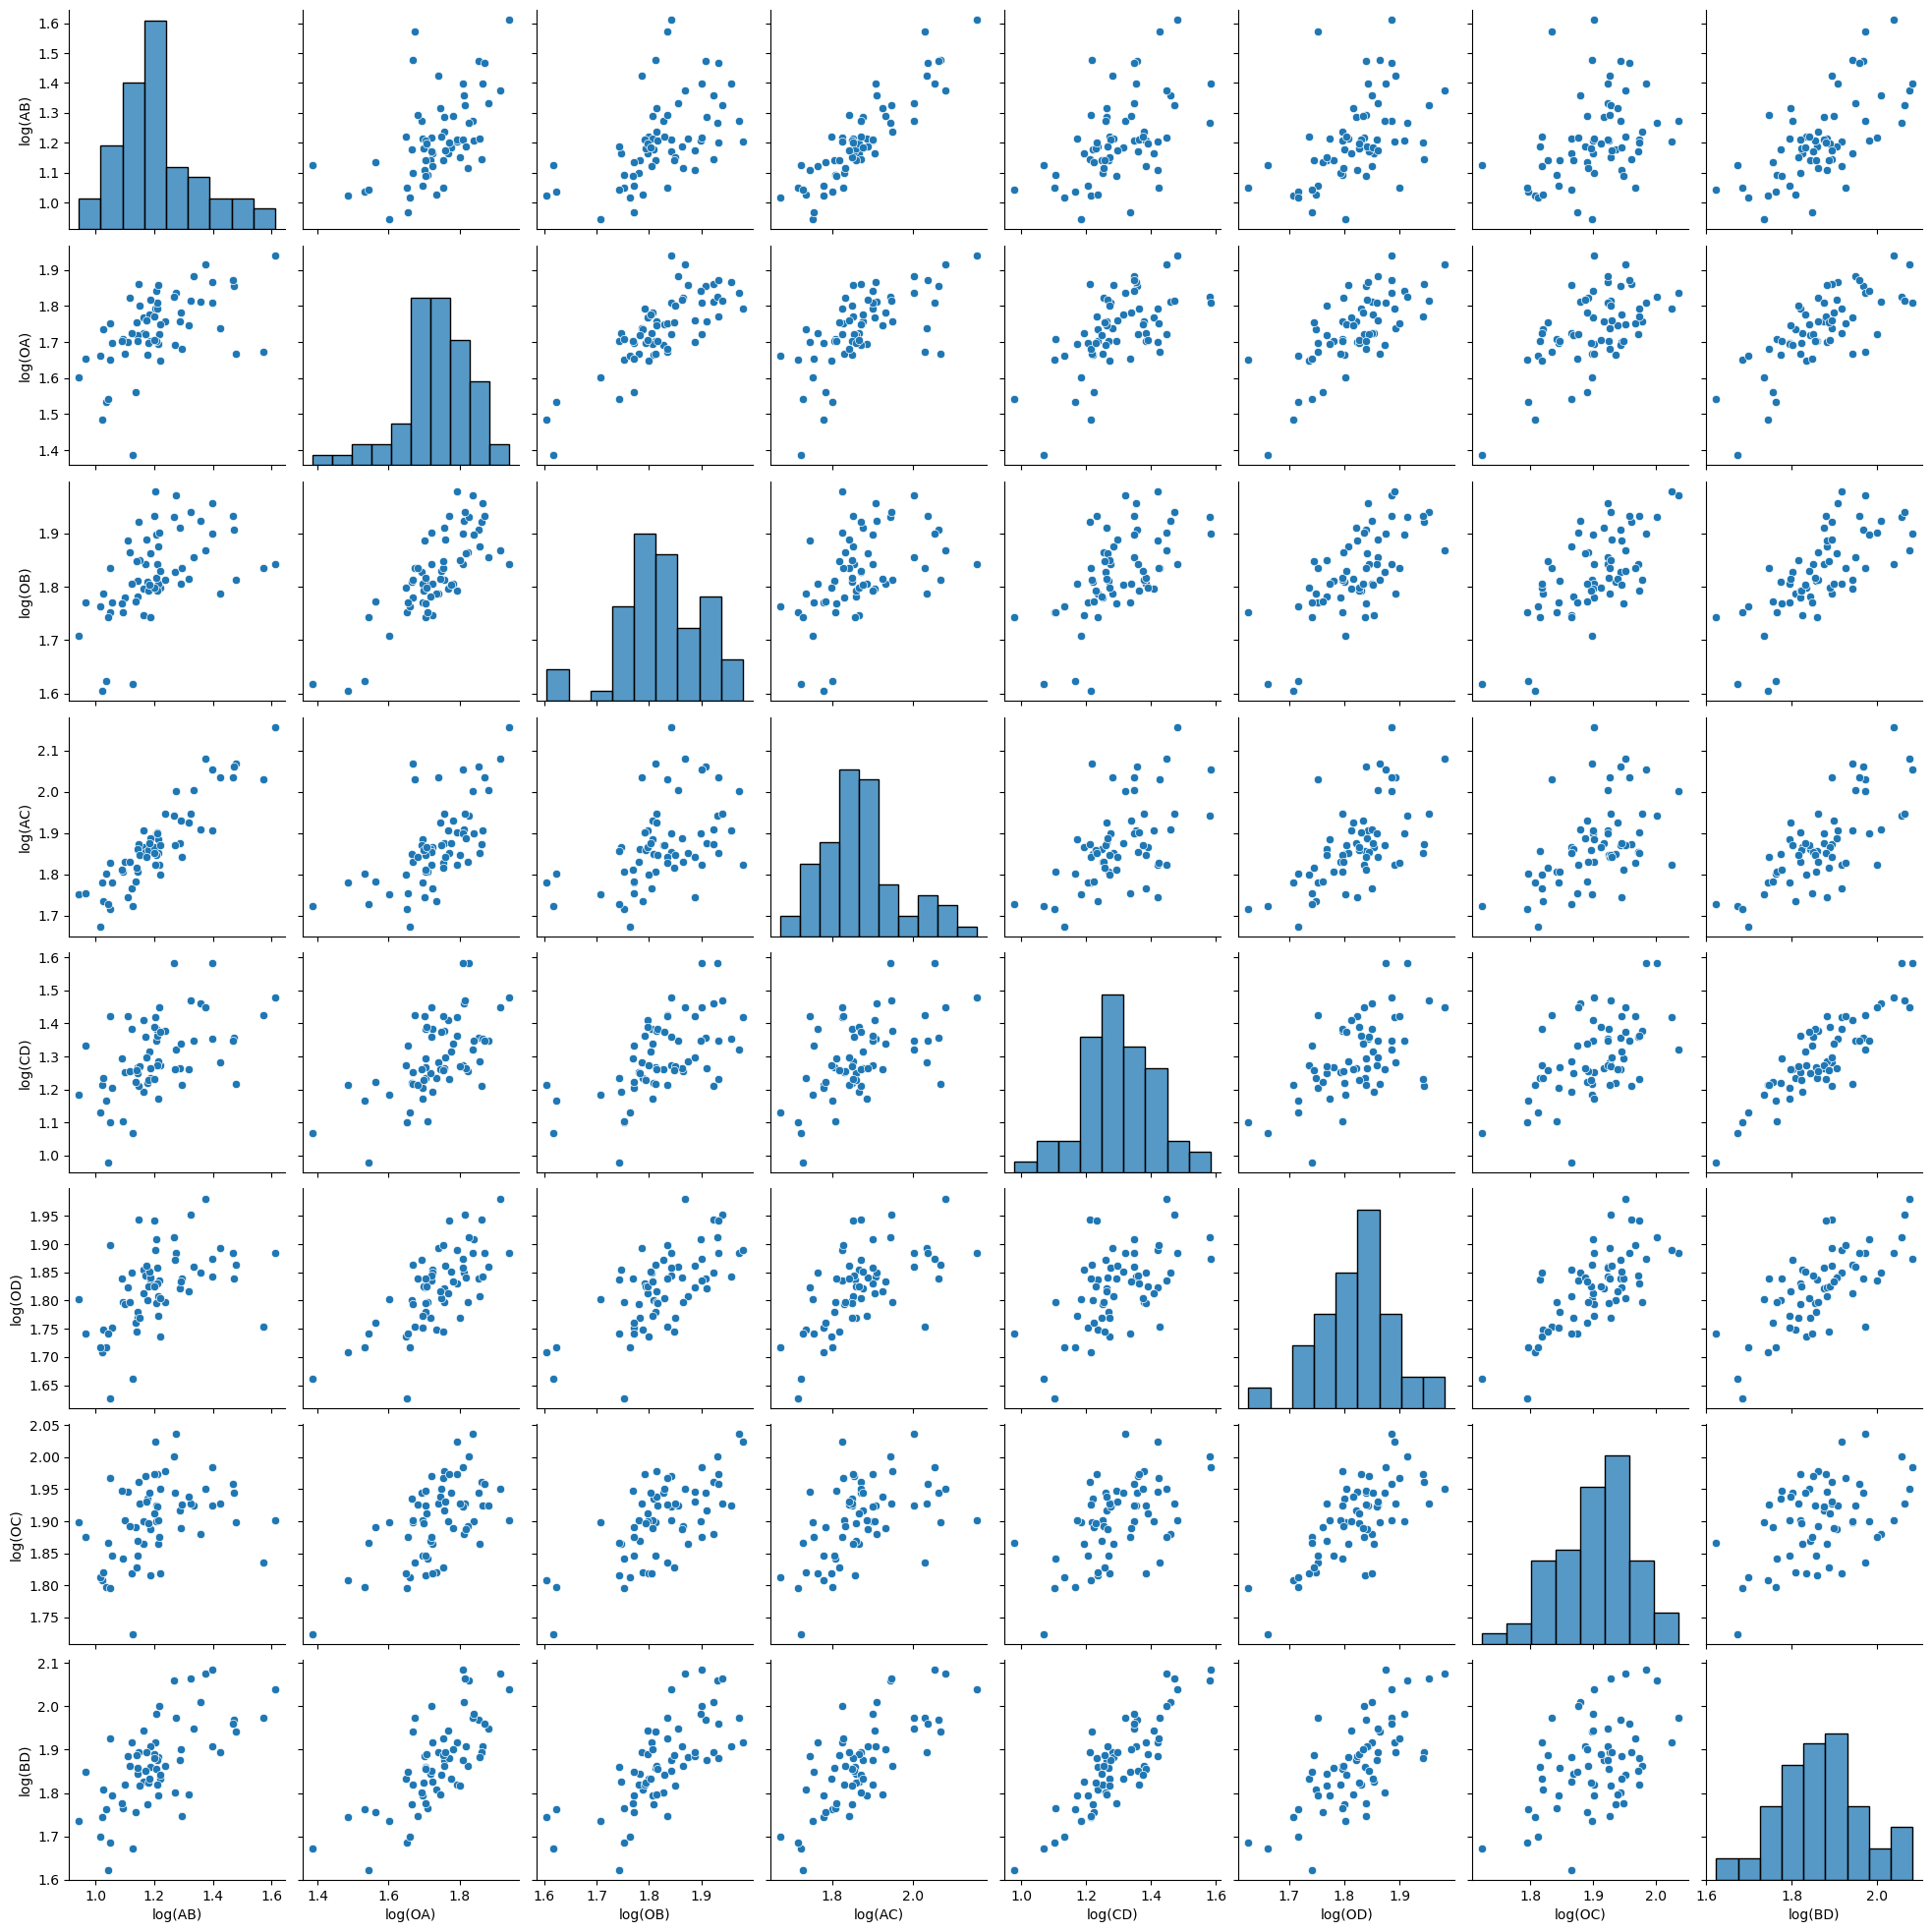

In [ ]:
df = sns.load_dataset('tips')
sns.pairplot(train.iloc[:,4:12])
plt.show()

<AxesSubplot: >

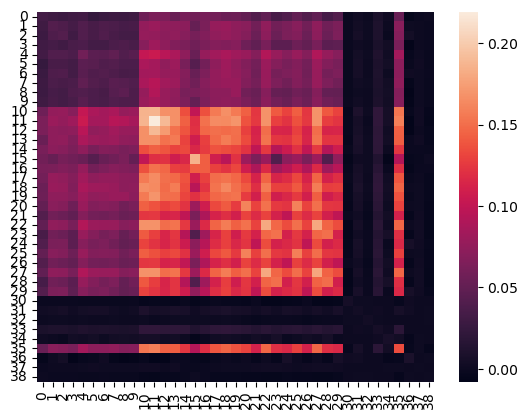

In [ ]:
n=4
# x=x_test[np.random.randint(1039,size=n)]
x=x_test[:25]
Cov=np.cov(np.transpose(x))
lab=[*range(39)]
sns.heatmap(Cov,xticklabels=lab,yticklabels=lab,fmt='g')

In [ ]:
Cov_train=np.cov(np.transpose(train.iloc[:,4:]))
Cov_test=np.cov(np.transpose(test))

<AxesSubplot: >

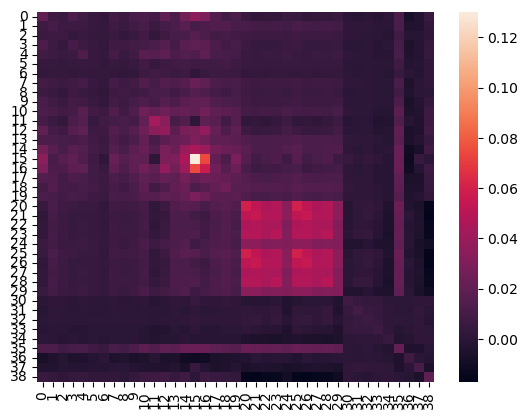

In [ ]:
# lab=list(train.columns[4:])
lab=[*range(39)]
sns.heatmap(Cov_train,xticklabels=lab,yticklabels=lab,fmt='g')

<AxesSubplot: >

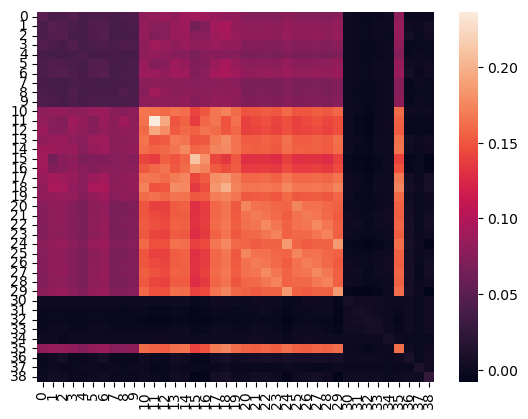

In [ ]:
# lab=list(train.columns[4:])
lab=[*range(39)]
sns.heatmap(Cov_test,xticklabels=lab,yticklabels=lab,fmt='g')

In [ ]:
Cov[11,11]

0.21919896000000005

In [ ]:
np.transpose(train.iloc[:,4:]).shape

(39, 64)